# INSPIRE HACKATHON-2024

## About Our Solution

Our project is not just another tech gadget; it's a transformative tool that revolutionizes how we plan and prepare for the future of our community's healthcare needs. Here's how it works and why it's such a game-changer:
1. #### Predictive Power
    By analyzing five years' worth of data from our health centers, our system becomes adept at spotting trends and patterns. It can then predict with remarkable accuracy how many people are likely to visit our centers in the coming years.

2. #### Insightful Details
    Beyond just numbers, our system digs deep into demographic details. It tells us which age groups are booming and whether there's a gender skew in certain demographics. This insight helps us tailor our services and resources accordingly.

3. #### Proactive Planning
    Armed with foresight into future population trends, we can plan ahead like never before. If we anticipate a surge in young families, we can ensure there are enough pediatricians and childcare facilities available. If we see a rise in elderly visitors, we can bolster geriatric care services.

4. #### Resource Optimization
    By knowing what's coming, we can allocate our resources more efficiently. No more guesswork or reactive measures; we can stay ahead of the curve and ensure our community's needs are met effectively.

5. #### Healthcare Equity
    Our system isn't just about predicting numbers; it's about ensuring equitable access to healthcare services for all. By understanding demographic shifts, we can identify underserved populations and channel resources where they're needed most, promoting fairness and inclusivity.

6. #### Cost Savings
    By anticipating demand and planning accordingly, we can avoid costly last-minute adjustments or overprovisioning of services. This translates to cost savings for our healthcare system and, ultimately, for the community as a whole.


As for our model we will compare between 6 algorithms of Classification to see the most optimal

<br>
<li>Linear Regression
<li>Decision Trees Regressor
<li>Random Forest Regressor
<li>Support Vector Machines (SVM)
<li>k-Nearest Neighbors (KNN)
<li>Naive Bayes
<br>

#### Here are the process of steps we are going to follow

1. Data Cleaning
    * Missing Values check
    * Feature Engineering
    * Encoding
2. Data Visualization
4. Data Preprocessing
    * Scaling Data
    * Spliting data
5. Building Models

## Import of libraries for data analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

The above libraries are loaded with an aim of helping us to do statistical manipulation on the data and give pictorial representations so as to give more insights into the feel of the data. 

### Load our data from 'data' directory

In [2]:
facility = pd.read_csv("./data/synthetic_facility_v2.csv")
hdss = pd.read_csv("./data/synthetic_hdss_v2.csv")

Let's have a look on our datasets by just displaying 5 rows for each dataset

In [3]:
facility.head()

,recnr,facilityname,firstname,lastname,petname,dob,sex,nationalid,patientid,visitdate
0,1,HC-V,Zaina,Hanifa,Kasozi,09-09-1930 00:00,2,NaN,20001,07-10-2019
1,2,HC-II,Godfrey,Maganda,Kirabo,02-07-1934 00:00,1,NaN,20002,10-09-2018
2,3,HC-III,Kasim,Ngobi,Malaika,11-02-1983 00:00,1,NaN,20003,14-12-2022
3,4,HC-IV,Esther,NaN,Bwino,30-07-1968 00:00,2,NaN,20004,09-06-2023
4,5,HC-V,Sumaya,Swabula,Kato,30-11-1930 00:00,2,NaN,20005,07-02-2019


In [4]:
hdss.head()

,recnr,firstname,lastname,petname,dob,sex,nationalid,hdssid,hdsshhid
0,1,Zaina,Hanifa,Ula,22-09-1930 00:00,2,NaN,I20001,HH100001
1,2,Godfrey,Maganda,Mukama,15-07-1934 00:00,1,NaN,I20002,HH100002
2,3,Kasim,Ngobi,Galabuzi,03-03-1983 00:00,1,NaN,I20003,HH100003
3,4,Esther,NaN,Inara,30-07-1968 00:00,2,NaN,I20004,HH100004
4,5,Sumaya,Swabula,NaN,13-12-1930 00:00,2,NaN,I20005,HH100005


It is evident that the data has 9 variables with some being numerical and others categorical e.g. all the names are just identifiers thus numerical. The sex is also categorical besides being identified as 1 or 2 which are just labels for gender with 1 being male and 2 being female.
The D.O.B are the years when the particular patient was born; it'll be used to get the client's age. 
HDSSID are the unique identification numbers that each patient gets upon visiting any of the facilities.

In [5]:
facility.describe()

,recnr,sex,nationalid,patientid
count,4115.000000,4115.00000,0.0,4115.000000
mean,2058.000000,1.64836,NaN,22058.000000
std,1188.042508,0.47754,NaN,1188.042508
min,1.000000,1.00000,NaN,20001.000000
25%,1029.500000,1.00000,NaN,21029.500000
50%,2058.000000,2.00000,NaN,22058.000000
75%,3086.500000,2.00000,NaN,23086.500000
max,4115.000000,2.00000,NaN,24115.000000


A statistical summary of the data reveals that there are 4115 rows in total. 

In [6]:
hdss.describe()

,recnr,sex,nationalid
count,4115.000000,4115.00000,0.0
mean,2058.000000,1.64836,NaN
std,1188.042508,0.47754,NaN
min,1.000000,1.00000,NaN
25%,1029.500000,1.00000,NaN
50%,2058.000000,2.00000,NaN
75%,3086.500000,2.00000,NaN
max,4115.000000,2.00000,NaN


After evaluating the two datasets, we can see that they almost all have the same fields apart the fact that <a>synthetic_facility_v2.csv</a> which has a few more fields like <strong>facility_name, visit date, and patient ID</strong>.<a>Synthetic_hdss_v2.csv</a>, however, has almost the same fields except for <strong>hdssid and hdsshhid</strong>. So, from here we can deliberately trim and append the two fields from <i>Synthetic_hdss_v2.csv</i> and append them to the <i>Synthetic_facility_v2.csv</i>. Additionally, we can see that they all have 4115 entries with✍️

Overall, the similar fields are:
<ol>
<li>recnr</li>
<li>firstName</li>
<li>lastName</li>
<li>petName</li>
<li>date of birth</li>
<li>sex</li>
<li>national Id</li>
</ol>

### ====== 1. Data Cleaning =======
#### (Missing values and Feature engineering)

In [7]:
## Get columns from hdss that are not in facility and append them to facility
columns_not_in_facility = hdss.columns[~hdss.columns.isin(facility.columns)]
hdss_filtered = hdss[columns_not_in_facility]
facility = pd.concat([facility, hdss_filtered], axis=1)
original_facility = facility

In [8]:
facility.head()

,recnr,facilityname,firstname,lastname,petname,dob,sex,nationalid,patientid,visitdate,hdssid,hdsshhid
0,1,HC-V,Zaina,Hanifa,Kasozi,09-09-1930 00:00,2,NaN,20001,07-10-2019,I20001,HH100001
1,2,HC-II,Godfrey,Maganda,Kirabo,02-07-1934 00:00,1,NaN,20002,10-09-2018,I20002,HH100002
2,3,HC-III,Kasim,Ngobi,Malaika,11-02-1983 00:00,1,NaN,20003,14-12-2022,I20003,HH100003
3,4,HC-IV,Esther,NaN,Bwino,30-07-1968 00:00,2,NaN,20004,09-06-2023,I20004,HH100004
4,5,HC-V,Sumaya,Swabula,Kato,30-11-1930 00:00,2,NaN,20005,07-02-2019,I20005,HH100005


In [9]:
# Check for missing values in our facility dataset
facility.isnull().sum()

recnr              0
facilityname       0
firstname          2
lastname          84
petname          284
dob                0
sex                0
nationalid      4115
patientid          0
visitdate          0
hdssid             0
hdsshhid           0
dtype: int64

From the results above we can see that nationality has absolutely no values while petname has a total of 284 missing values. So we will get rid of the missing values.

#### Furthermore, some fields like recnr, hdssid, hdsshhid and patientid do not carry any information for our data understanding because they are just numeros which were incremented by one when registering. so we can also get rid of them to remain with significant data

In [10]:
columns_to_remove = ['recnr', 'nationalid', 'hdssid', 'hdsshhid', 'patientid']
facility.drop(columns=columns_to_remove, inplace=True)

In [11]:
facility.head()

,facilityname,firstname,lastname,petname,dob,sex,visitdate
0,HC-V,Zaina,Hanifa,Kasozi,09-09-1930 00:00,2,07-10-2019
1,HC-II,Godfrey,Maganda,Kirabo,02-07-1934 00:00,1,10-09-2018
2,HC-III,Kasim,Ngobi,Malaika,11-02-1983 00:00,1,14-12-2022
3,HC-IV,Esther,NaN,Bwino,30-07-1968 00:00,2,09-06-2023
4,HC-V,Sumaya,Swabula,Kato,30-11-1930 00:00,2,07-02-2019


### Feature Engineering
From this dataset, we have two important fields, <i>date of birth and visit data</i>. From these two colums, we can be able to get in which year they visited the health center and more importantly, how old were they by the time they visited the health center.

In [ ]:
#get birth data in terms of of years
year = []
for i in range(0, len(facility['dob'])):
    year.append(facility['dob'][i].split('-')[-1].split(' ')[0])
facility["dob"] = year

## Get the visit date in terms of years
ages = []
for index, row in facility.iterrows():
    visit_date_now = row['visitdate'].split('-')[-1]
    ages.append(int(visit_date_now))

data = pd.array(ages)

facility["visitdate"] = data

# Create a new field (column) which will then tell how old they were by the time they visited the health center
facility['Ages'] = data-facility["dob"].astype(int)

In [13]:
facility.head()

,facilityname,firstname,lastname,petname,dob,sex,visitdate,Ages
0,HC-V,Zaina,Hanifa,Kasozi,1930,2,2019,89
1,HC-II,Godfrey,Maganda,Kirabo,1934,1,2018,84
2,HC-III,Kasim,Ngobi,Malaika,1983,1,2022,39
3,HC-IV,Esther,NaN,Bwino,1968,2,2023,55
4,HC-V,Sumaya,Swabula,Kato,1930,2,2019,89


Let's visualize the age distribution

Text(0, 0.5, 'Number of people')

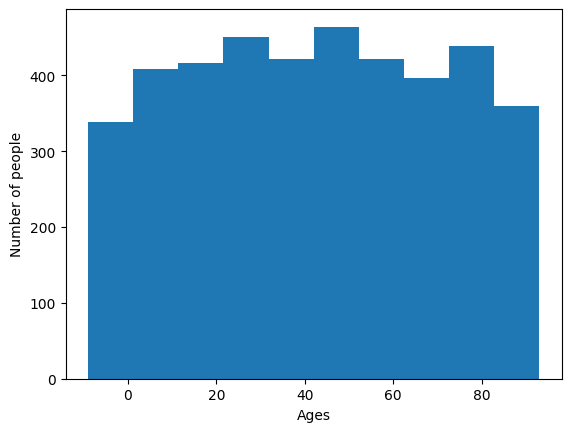

In [14]:
plt.hist(facility["Ages"])
plt.xlabel("Ages")
plt.ylabel("Number of people")

From the histogram above, we can see that due to the large size of the data, normality is assumed by the fact that there's no outright skewness in the data. However, some anomalies can be seen like the age assuming negative values; this is impratical since age can only be 0 or more. As such, a bit of data cleaning needs to be done to do away with the negative ages as follows.

The negative ages have been assigned NaN at first to help in the calculation of the mean age. The ages with NaN entries are then assigned the average age afore-calculated.

In [15]:
# Replace negative ages with NaN
facility.loc[facility['Ages'] < 0, 'Ages'] = np.nan

# Calculate the mean age (excluding NaN values)
mean_age = facility['Ages'].mean()

# Convert mean_age to float explicitly
mean_age = round(mean_age)

# Replace NaN values with the mean
facility['Ages'].fillna(mean_age, inplace=True)

print(facility)

     facilityname firstname lastname   petname   dob  sex  visitdate  Ages
0            HC-V     Zaina   Hanifa    Kasozi  1930    2       2019    89
1           HC-II   Godfrey  Maganda    Kirabo  1934    1       2018    84
2          HC-III     Kasim    Ngobi   Malaika  1983    1       2022    39
3           HC-IV    Esther      NaN     Bwino  1968    2       2023    55
4            HC-V    Sumaya  Swabula      Kato  1930    2       2019    89
...           ...       ...      ...       ...   ...  ...        ...   ...
4110        HC-IV   Sharita  Nabirye    Nakato  1981    2       2023    42
4111        HC-IV    Tenywa   Kapiso  Nakayaga  1998    1       2020    22
4112        HC-IV    Mariam  Babirye  Nakayiwa  1986    2       2019    33
4113       HC-III   Nangobi    Tracy  Nakayiza  2001    2       2020    19
4114         HC-V    Joshua   Kasubi  Nakayiza  1990    1       2020    30

[4115 rows x 8 columns]


### Now in order to understand more on the people who visited our health center. Let's look at their age groups. 
for Age goup, we are goind for Age Categories, Life Cycle Groupings
Children (00-14 years)
Youth (15-24 years)
Adults (25-64 years)
Seniors (65 years and over)

In [16]:
# Define age group bins and labels
bins = [0, 14, 24, 64, float('inf')]
labels = ['Children', 'Youth', 'Adults', 'Old']
# Create a new column 'AgeGroup' based on age categories
facility['AgeGroup'] = pd.cut(facility['Ages'], bins=bins, labels=labels, right=False)

# Create separate columns for each age group (1 if in group, 0 otherwise)
for label in labels:
    facility[label] = (facility['AgeGroup'] == label).astype(int)

# Drop the original 'AgeGroup' column if needed
facility.drop(columns=['AgeGroup'], inplace=True)

In [ ]:
facility

,facilityname,firstname,lastname,petname,dob,sex,visitdate,Ages,Children,Youth,Adults,Old
0,HC-V,Zaina,Hanifa,Kasozi,1930,2,2019,89,0,0,0,1
1,HC-II,Godfrey,Maganda,Kirabo,1934,1,2018,84,0,0,0,1
2,HC-III,Kasim,Ngobi,Malaika,1983,1,2022,39,0,0,1,0
3,HC-IV,Esther,NaN,Bwino,1968,2,2023,55,0,0,1,0
4,HC-V,Sumaya,Swabula,Kato,1930,2,2019,89,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4110,HC-IV,Sharita,Nabirye,Nakato,1981,2,2023,42,0,0,1,0
4111,HC-IV,Tenywa,Kapiso,Nakayaga,1998,1,2020,22,0,1,0,0
4112,HC-IV,Mariam,Babirye,Nakayiwa,1986,2,2019,33,0,0,1,0
4113,HC-III,Nangobi,Tracy,Nakayiza,2001,2,2020,19,0,1,0,0


The ages have been put into groups in that any one who paid a visit to the facility is identified as either a child, an adult or old.

### Also for our dataset, fields like firstName, lastName and petName are not telling us more if we want to understand which category of people who visited our health centers. Now that we have their gender and their age, we can use that and get rid of no information bearing fields.

In [ ]:
facility.drop(columns=['firstname', 'lastname', 'petname', 'dob'], inplace=True)
facility.head()

,facilityname,sex,visitdate,Ages,Children,Youth,Adults,Old
0,HC-V,2,2019,89,0,0,0,1
1,HC-II,1,2018,84,0,0,0,1
2,HC-III,1,2022,39,0,0,1,0
3,HC-IV,2,2023,55,0,0,1,0
4,HC-V,2,2019,89,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Get all the faciliteis that we have so far

total_facility_names = facility['facilityname'].unique()
occurrence_counts = facility['facilityname'].value_counts().reindex(total_facility_names, fill_value=0)
occurrence_counts

facilityname
HC-V      810
HC-II     847
HC-III    830
HC-IV     782
HC-I      846
Name: count, dtype: int64

Facility II recorded the highest number of visits while facility IV recorded the least number of visits.

In [ ]:
encoder = LabelEncoder()
general_data = facility
people_to_HC_I = facility[facility["facilityname"]=="HC-I"]
people_to_HC_II = facility[facility["facilityname"]=="HC-II"]
people_to_HC_III = facility[facility["facilityname"]=="HC-III"]
people_to_HC_IV = facility[facility["facilityname"]=="HC-IV"]
people_to_HC_V = facility[facility["facilityname"]=="HC-V"]

facility["facilityname"]= encoder.fit_transform(facility["facilityname"])

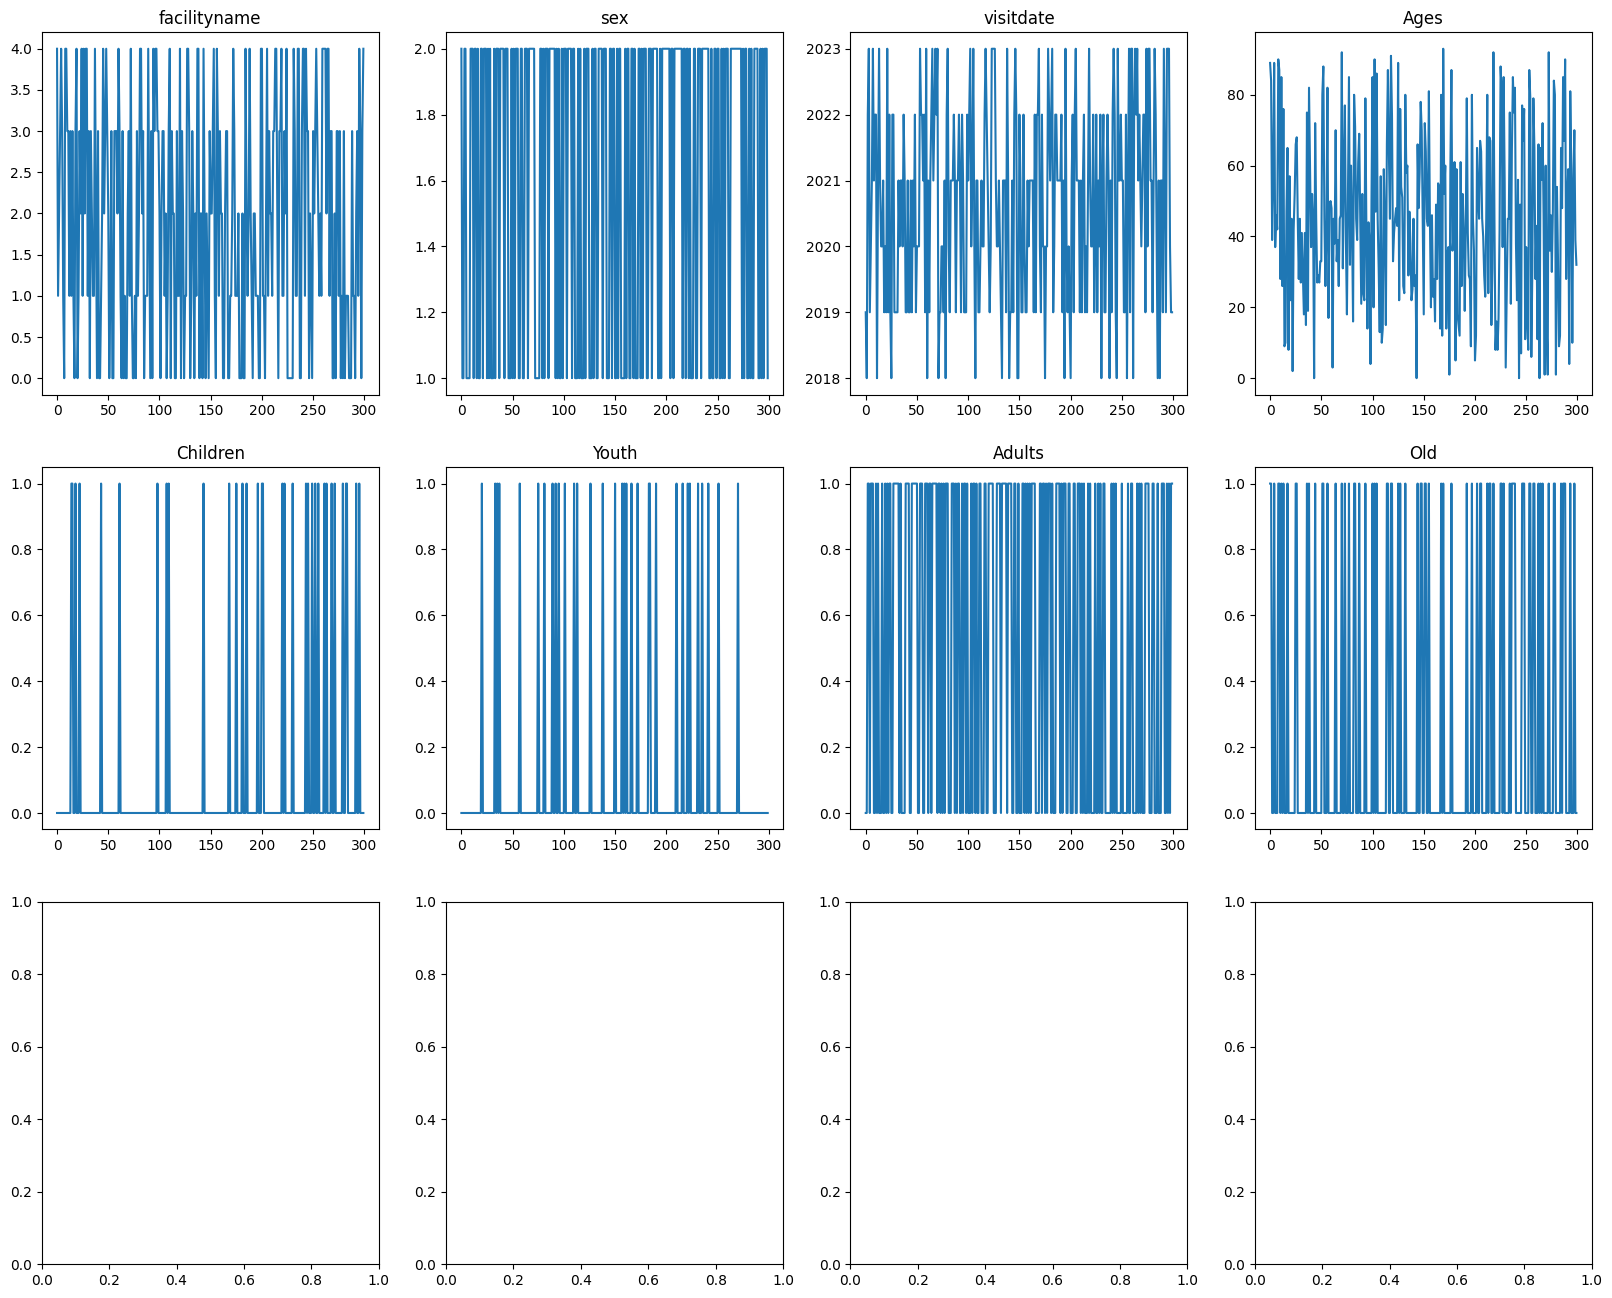

In [ ]:
fig, ax = plt.subplots(figsize=(20,16),nrows=3, ncols=4)
for i,col in enumerate(facility.columns):
    facility.head(300)[col].plot(ax=ax[i//4,i%4],title=col)

A look into the behavior of each of the age catgories reveals that the frequent visitors to the facilities are the adults as shown by the closeness of the bars. The category with the least visits is the children category. From this, we can deduce that the paediatric, pre and post paternal care could be so in the facilities or could not be provided at all in the facilities. The former would mean, children are well taken care of at birth and shortly after birth thus they are healthy and the latter would imply no paediatric assistance in any of the five facilities thus parents opt to visit other facilities. 

array([[<Axes: title={'center': 'facilityname'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'visitdate'}>],
       [<Axes: title={'center': 'Ages'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Youth'}>],
       [<Axes: title={'center': 'Adults'}>,
        <Axes: title={'center': 'Old'}>, <Axes: >]], dtype=object)

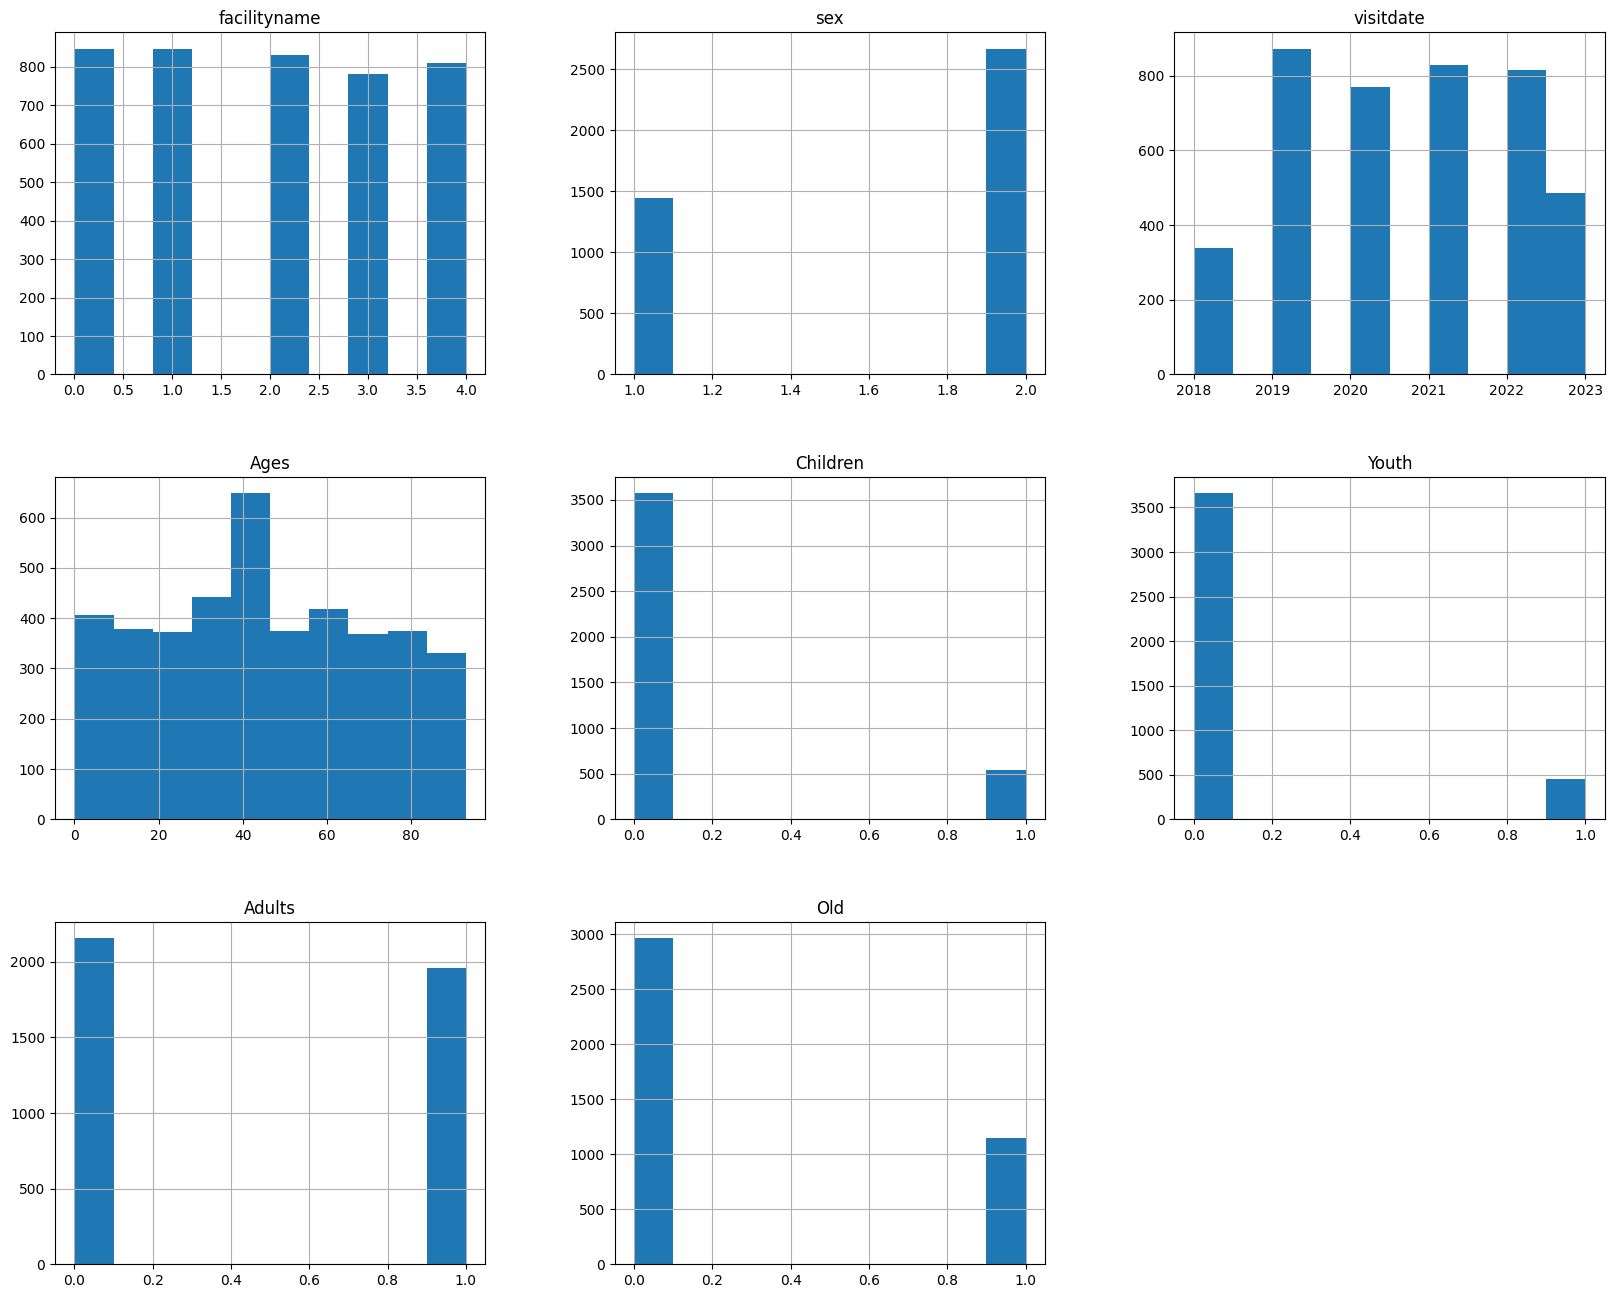

In [ ]:
facility.hist(figsize=(20,16))

In [ ]:
facility.corr().style.background_gradient()

,facilityname,sex,visitdate,Ages,Children,Youth,Adults,Old
facilityname,1.000000,0.015754,-0.037032,-0.001817,-0.027777,0.002318,0.047514,-0.033508
sex,0.015754,1.000000,0.003052,-0.008101,0.000967,-0.014481,0.023657,-0.016902
visitdate,-0.037032,0.003052,1.000000,0.064985,-0.023194,-0.004445,-0.047905,0.073915
Ages,-0.001817,-0.008101,0.064985,1.000000,-0.598047,-0.375224,-0.064841,0.786490
Children,-0.027777,0.000967,-0.023194,-0.598047,1.000000,-0.138272,-0.372622,-0.243627
Youth,0.002318,-0.014481,-0.004445,-0.375224,-0.138272,1.000000,-0.337501,-0.220664
Adults,0.047514,0.023657,-0.047905,-0.064841,-0.372622,-0.337501,1.000000,-0.594655
Old,-0.033508,-0.016902,0.073915,0.786490,-0.243627,-0.220664,-0.594655,1.000000


Most of the variables are negatively correlated with values close to zero meaning that there's little or no dependence between then. However, the correlation between age and visit date bares a little significance of positive correlation; as the age goes up, the number of visits increase as well. 

In [ ]:
unique_years = facility['visitdate'].unique()
occurrence_years = facility['visitdate'].value_counts().reindex(unique_years, fill_value=0)
occurrence_years

visitdate
2019    873
2018    340
2022    816
2023    487
2020    770
2021    829
Name: count, dtype: Int64

The year 2019 overally recorded the highest number of visits than any other year while 2018 recorded the least number of visits. Generally, the covid period of between 2019 - 2021 had the highest number of patients visit the facilities. 

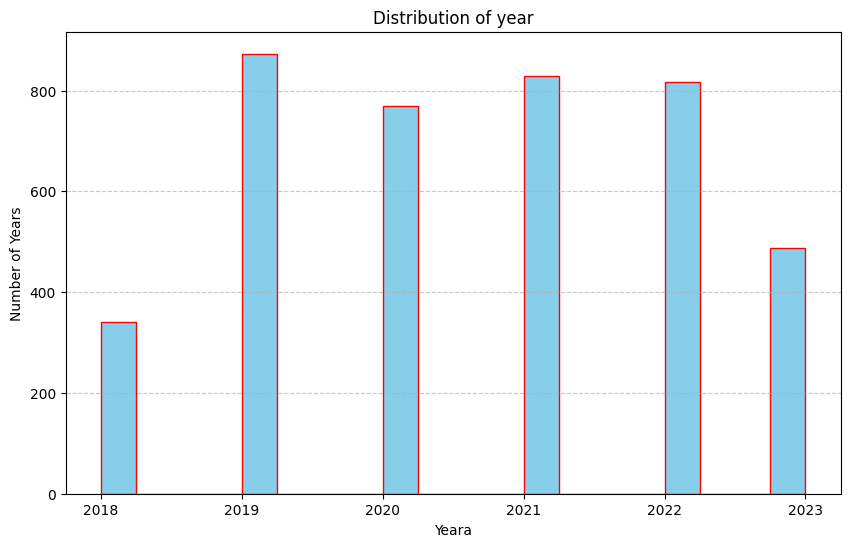

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(general_data['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Year')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Now Let's calculate the correlation between visit date and their counts**

In [ ]:


# Count occurrence of each unique date
date_counts = general_data['visitdate'].value_counts()

# Calculate the correlation (Spearman rank correlation)
correlation = date_counts.corr(pd.Series(range(1, len(unique_years) + 1), index=unique_years), method='spearman')

print(f"Correlation between unique visit dates and their counts: {correlation:.4f}")

Correlation between unique visit dates and their counts: -0.0286


**Let's vizualize the distribution of ages over the years for HC_I**

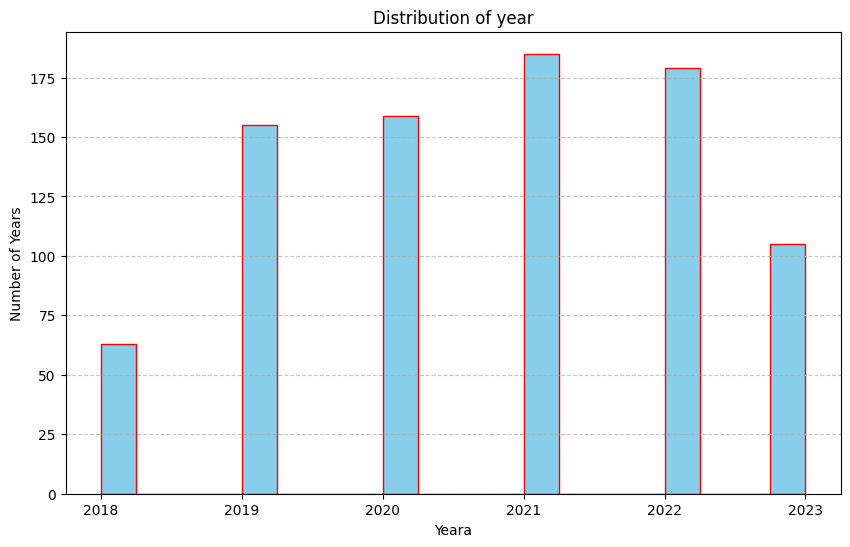

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(people_to_HC_I['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Yeara')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Let's vizualize the distribution of ages over the years for HC_II**

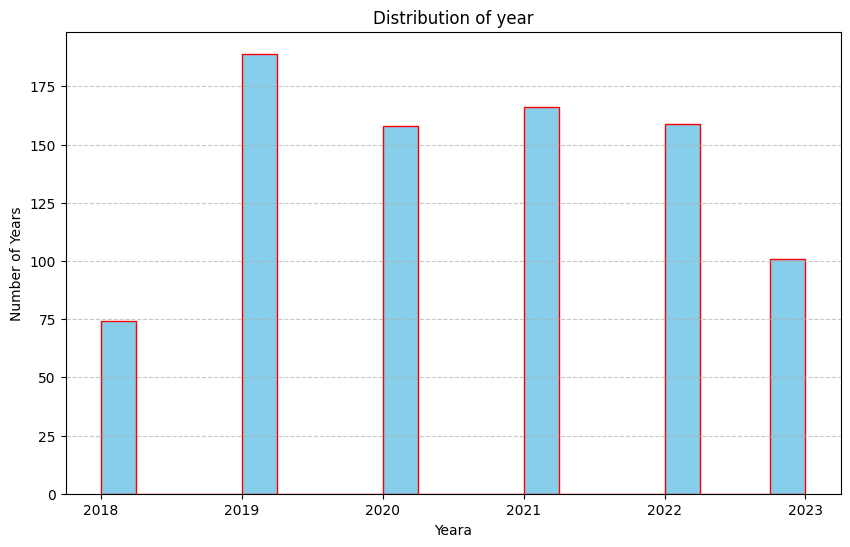

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(people_to_HC_II['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Yeara')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Let's vizualize the distribution of ages over the years for HC_III**

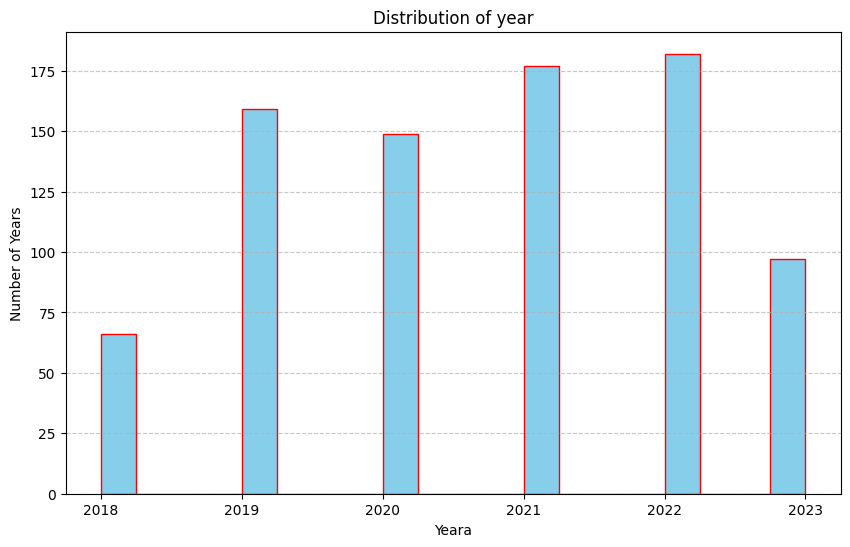

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(people_to_HC_III['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Yeara')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Let's vizualize the distribution of ages over the years for HC_IV**

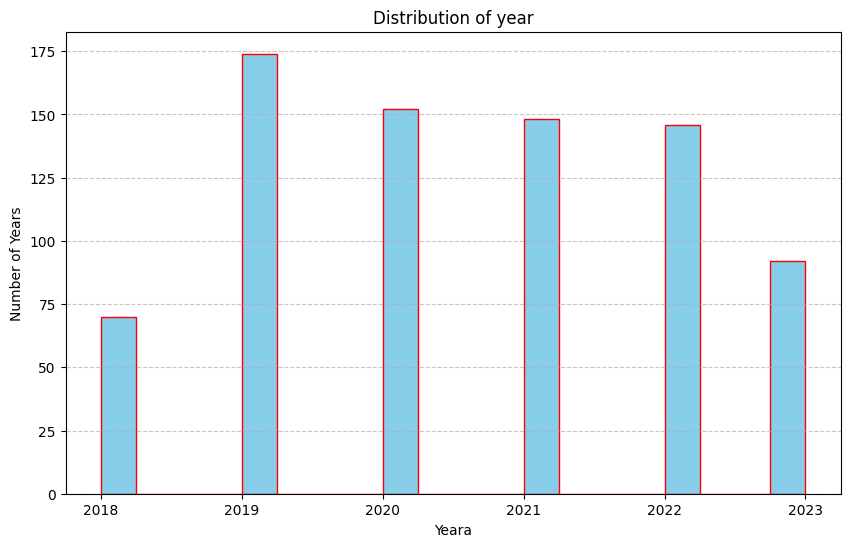

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(people_to_HC_IV['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Yeara')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Let's vizualize the distribution of ages over the years for HC_V**

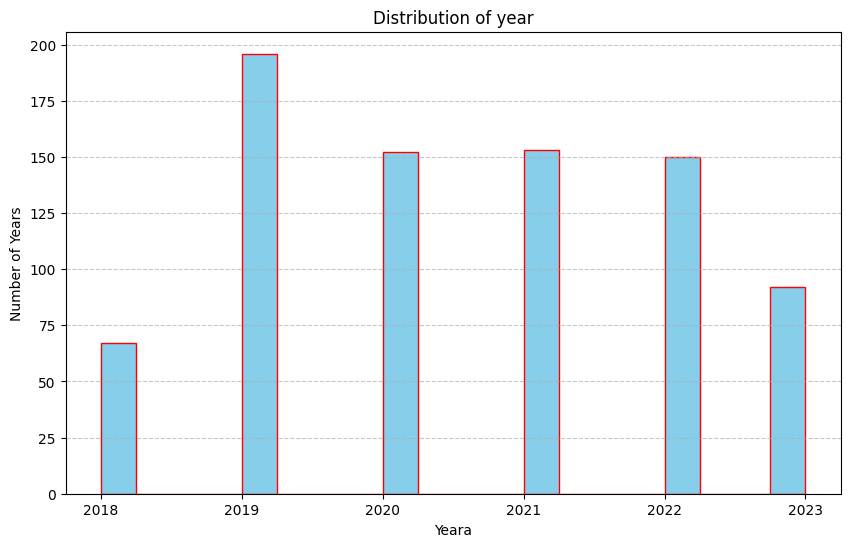

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(people_to_HC_V['visitdate'].astype(int), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of year')
plt.xlabel('Yeara')
plt.ylabel('Number of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Let's now look at the distribution of the patients of the 5 health centers on the basis of gender**

In [ ]:
unique_total_facility = facility['facilityname'].unique()
labels = ['Children', 'Youth', 'Adults', 'Old']

for health_center in unique_total_facility:
    health_center = facility[facility["facilityname"]==health_center]
    for col in labels:
        count_ones = (health_center[col] == 1).sum()
    number_of_men=  health_center['sex'].value_counts().get(1, 0)
    number_of_women =  health_center['sex'].value_counts().get(2, 0)
    print(f'TOTAL: {number_of_women + number_of_men}\nMen: {number_of_men}  Percentage: {round(number_of_men*100/(number_of_men+number_of_women))}%\nWomen: {number_of_women} Percentage: {round(number_of_women*100/(number_of_men+number_of_women))}%')
    print(" ")

TOTAL: 810
Men: 281  Percentage: 35%
Women: 529 Percentage: 65%
 
TOTAL: 847
Men: 295  Percentage: 35%
Women: 552 Percentage: 65%
 
TOTAL: 830
Men: 309  Percentage: 37%
Women: 521 Percentage: 63%
 
TOTAL: 782
Men: 255  Percentage: 33%
Women: 527 Percentage: 67%
 
TOTAL: 846
Men: 307  Percentage: 36%
Women: 539 Percentage: 64%
 


In [ ]:
facility.drop(columns=['facilityname'], inplace=True)
facility.head()

,sex,visitdate,Ages,Children,Youth,Adults,Old
0,2,2019,89,0,0,0,1
1,1,2018,84,0,0,0,1
2,1,2022,39,0,0,1,0
3,2,2023,55,0,0,1,0
4,2,2019,89,0,0,0,1


In [ ]:
unique_YEARS = facility['visitdate'].unique()
labels = ['Children', 'Youth', 'Adults', 'Old']
Year = []
Total = []
Children = []
Youth = []
Adults = []
Old = []


for year in unique_YEARS:
    Year.append(year)
    year1 = year
    year_data = facility[facility["visitdate"]==year]
    Children.append((year_data["Children"] == 1).sum())
    Youth.append((year_data["Youth"] == 1).sum())
    Adults.append((year_data["Adults"] == 1).sum())
    Old.append((year_data["Old"] == 1).sum())
   
    number_of_men=  year_data['sex'].value_counts().get(1, 0)
    number_of_women =  year_data['sex'].value_counts().get(2, 0)
    Total.append(number_of_men + number_of_women)
    print(f'TOTAL YEAR {year1}: {number_of_women + number_of_men}\nMen: {number_of_men}  Percentage: {round(number_of_men*100/(number_of_men+number_of_women))}%\nWomen: {number_of_women} Percentage: {round(number_of_women*100/(number_of_men+number_of_women))}%')
    print(" ")


TOTAL YEAR 2019: 873
Men: 309  Percentage: 35%
Women: 564 Percentage: 65%
 
TOTAL YEAR 2018: 340
Men: 126  Percentage: 37%
Women: 214 Percentage: 63%
 
TOTAL YEAR 2022: 816
Men: 295  Percentage: 36%
Women: 521 Percentage: 64%
 
TOTAL YEAR 2023: 487
Men: 170  Percentage: 35%
Women: 317 Percentage: 65%
 
TOTAL YEAR 2020: 770
Men: 262  Percentage: 34%
Women: 508 Percentage: 66%
 
TOTAL YEAR 2021: 829
Men: 285  Percentage: 34%
Women: 544 Percentage: 66%
 


In [ ]:
data = {
    "Year": Year,
    "Total": Total,
    "Children": Children,
    "Youth": Youth,
    "Adults": Adults,
    "Old":Old,
}

In [ ]:
new_data = pd.DataFrame(data = data)

In [ ]:
new_data.head(6)

,Year,Total,Children,Youth,Adults,Old
0,2019,873,104,95,435,239
1,2018,340,62,32,177,69
2,2022,816,102,81,374,259
3,2023,487,56,49,215,167
4,2020,770,100,96,383,191
5,2021,829,121,105,376,227


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Models to use
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Extracting the feature "Year" from the dataset
X_train = new_data["Year"]

# Reshaping the feature to be a column vector
X_train = X_train.values.reshape(-1, 1)

# Extracting the target variables "Total", "Children", "Youth", "Adults", and "Old" from the dataset
Y_train = new_data[["Total", "Children", "Youth", "Adults", "Old"]]


In [ ]:
X_train

array([[2019],
       [2018],
       [2022],
       [2023],
       [2020],
       [2021]], dtype=int64)

In [ ]:
Y_train

,Total,Children,Youth,Adults,Old
0,873,104,95,435,239
1,340,62,32,177,69
2,816,102,81,374,259
3,487,56,49,215,167
4,770,100,96,383,191
5,829,121,105,376,227


In [ ]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

## Building Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train_data,y_train_data)
pred = model.predict(X_test_data)

In [ ]:
from sklearn.metrics import mean_squared_error
predicted = np.round(pred)
print(mean_squared_error(predicted, y_test_data))

25430.6


## Building Logistic Regression Model

In [ ]:
# Initialize kNN model
knn_model = KNeighborsClassifier()
# Train the model
knn_model.fit(X_train_data, y_train_data)
# Predictions on the test set
y_predicted_values_knn = knn_model.predict(X_test_data)
y_predicted_values_knn


array([[340,  56,  32, 177,  69]], dtype=int64)

In [ ]:
# Creating an instance of the RandomForestRegressor
model = RandomForestRegressor()

# Fitting the model to the training data
model.fit(X_train_data, y_train_data)

# Making predictions on the test data
preds = model.predict(X_test_data)

# Printing the predictions
print(preds)

# Calculating and printing the R2 score (if uncommented)
# print(r2_score(preds, y_test))

array([[476.54,  75.94,  52.13, 237.87, 110.6 ]])